(rk2-section)=
# The Second-Order Runge-Kutta Method

We have seen in previous sections on the [Euler method](euler-method-section) and [error analysis](error-analysis-section) that the Euler method gives a poor approximation of the exact solution. This is because the Euler method is only first-order accurate and we can obtain a more accurate approximation of the solution using a second-order method such as the second-order Runge-Kutta method (RK2).

````{admonition} Definition: The second-order Runge-Kutta method (RK2)
:class: note
:name: rk2-definition

The RK2 method for solving the initial value problem $y' = f(t, y)$, $t \in [a, b]$, $y_0 = y(a)$ is 

```{math}
:label: rk2-equation
\begin{align*}
    y_{n+1} &= y_n + \frac{h}{2}(k_1 + k_2),\\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + h, y_n + h k_1).
\end{align*} 
```

where $h = t_{n+1} - t_n$.
````

The derivation of the RK2 method is covered in the [derivation of Explicit Runge-Kutta Methods](rk2-derivation-section).

````{admonition} Example 1.3
:class: seealso
:name: rk2-example

Calculate the solution to the initial value problem from [example 1.2](euler-example) using the RK2 method with a step length of $h = 0.2$

\begin{align*}
    y'=ty, \qquad t\in [0,1], \qquad y(0)=1,
\end{align*}

and compare the computed solution to the exact solution which is $y = \exp\left(\dfrac{t^2}{2}\right)$.

```{dropdown} Solution
From [example 1.2](euler-example) we know that the number of steps is 5 and $\mathbf{t} = (0, 0.2, 0.4, 0.6, 0.8, 1.0).$ The ODE function is $f(t, y) = t y$ and initial value is $y_0 = 1$ so using equation {eq}`rk2-equation`

\begin{align*}
    k_1 &= f(t_0, y_0) = (0.0)(1) = 0, \\
    k_2 &= f(t_0 + h, y_0 + hk_1) = (0.0 + 0.2)(1 + 0.2(0)) = 0.2, \\
    y_1 &= y_0 + \frac{h}{2}(k_1 + k_2) = 1 + 0.1(0 + 0.2) = 1.02, \\ \\
    k_1 &= f(t_1, y_1) = (0.2)(1.02) = 0.204, \\
    k_2 &= f(t_1 + h, y_1 + hk_1) = (0.2 + 0.2)(1.02 + 0.2(0.204)) \\
    &= 0.424320, \\
    y_2 &= y_1 + \frac{h}{2}(k_1 + k_2) = 1.02 + 0.1(0.204 + 0.424320) \\
    &= 1.082832, \\ \\
    k_1 &= f(t_2, y_2) = (0.4)(1.082832) = 0.433133, \\
    k_2 &= f(t_2 + h, y_2 + hk_1) = (0.4 + 0.2)(1.082832 + 0.2(0.433133)) \\
    &= 0.701675, \\
    y_3 &= y_2 + \frac{h}{2}(k_1 + k_2) = 1.082832 + 0.1(0.433133 + 0.701675) \\
    &= 1.196313, \\ \\
    k_1 &= f(t_3, y_3) = (0.6)(1.196313) = 0.717788, \\
    k_2 &= f(t_3 + h, y_3 + hk_1) = (0.6 + 0.2)(1.196313 + 0.2(0.717788)) \\
    &= 1.071896, \\
    y_4 &= y_3 + \frac{h}{2}(k_1 + k_2) = 1.196313 + 0.1(0.717788 + 1.071896) \\
    &= 1.375281, \\ \\
    k_1 &= f(t_4, y_4) = (0.8)(1.375281) = 1.100225, \\
    k_2 &= f(t_4 + h, y_4 + hk_1) = (0.8 + 0.2)(1.375281 + 0.2(1.100225)) \\
    &= 1.595326, \\
    y_5 &= y_4 + \frac{h}{2}(k_1 + k_2) = 1.375281 + 0.1(1.100225 + 1.595326) \\
    &= 1.644836.
\end{align*}
```
````

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(t, y):
    return t * y

# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

nsteps = int((tspan[1] - tspan[0]) / h)
neq = len(y0)
t = np.arange(nsteps + 1) * h
y = np.zeros((nsteps + 1, neq))
y[0,:] = y0

print(r"\begin{align*}")
for n in range(nsteps):
    k1 = f(t[n], y[n,:])
    k2 = f(t[n] + h, y[n,:] + h * k1)
    y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
    print(rf"    k_1 &= f(t_{n}, y_{n}) = ({t[n]:0.1f})({y[n,0]:0.6f}) = {k1[0]:0.6f}, \\")
    print(rf"    k_2 &= f(t_{n} + h, y_{n} + hk_1) = ({t[n]:0.1f} + {h})({y[n,0]:0.6f} + {h}({k1[0]:0.6f})) \\")
    print(rf"    &= {k2[0]:0.6f}, \\")
    print(rf"    y_{n+1} &= y_{n} + \frac{{h}}{{2}}(k_1 + k_2) = {y[n,0]:0.6f} + {h/2}({k1[0]:0.6f} + {k2[0]:0.6f}) \\")
    print(rf"    &= {y[n,0]:0.6f}", end="")
    if n < nsteps - 1:
        print(rf", \\ \\")
    else:
        print(rf".")

print(r"\end{align*}")

ModuleNotFoundError: No module named 'numpy'

(rk2-python-code)=
## Python code

The Python code below defines a function called `rk2()` which computes the solution to an initial value problem using the RK2 method. The function is very similar to the function for the [Euler method](py:euler) with the exception the commands are added to the `for` loop to calculate the stage values and update the solution.

In [2]:
def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y

The computed solutions to the initial value problem from [example 1.3](rk2-example) using the Euler and RK2 methods and the exact solutions are plotted in {numref}`rk2-example-figure` below. Note that the RK2 method is significantly more accurate than the Euler method.

```{glue:figure} rk2_example_plot 
:name: rk2-example-figure

The solutions to the IVP $y'=ty$, $t\in[0,1]$, $y(0)=1$ using the Euler and RK2 methods with $h=0.2$.
```

| $t_n$ |   $y_n$   |   $k_1$   |   $k_2$   |
|:-----:|:---------:|:---------:|:---------:|
|  0.00 |  1.000000 |  0.000000 |  0.200000 |
|  0.20 |  1.020000 |  0.204000 |  0.424320 |
|  0.40 |  1.082832 |  0.433133 |  0.701675 |
|  0.60 |  1.196313 |  0.717788 |  1.071896 |
|  0.80 |  1.375281 |  1.100225 |  1.595326 |
|  1.00 |  1.644836 |    -      |     -     |


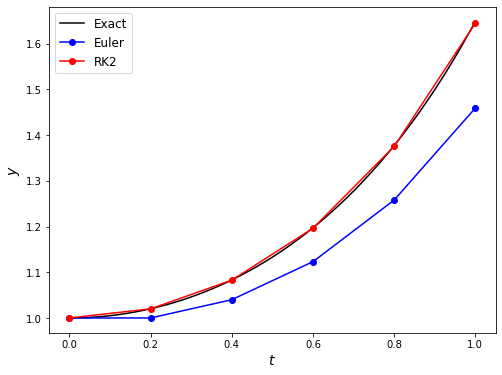

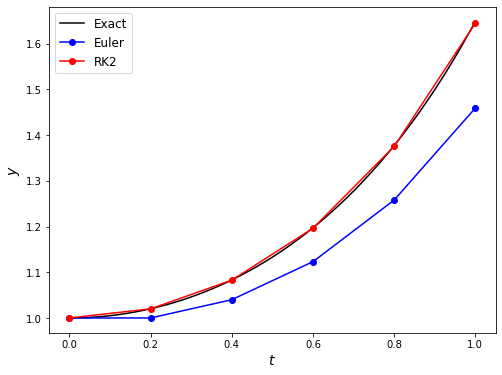

In [3]:
def euler(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    for n in range(len(t) - 1):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def rk2(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    print("| $t_n$ |   $y_n$   |   $k_1$   |   $k_2$   |")
    print("|:-----:|:---------:|:---------:|:---------:|")
    for n in range(len(t) - 1):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        print(f"| {t[n]:5.2f} | {y[n,0]:9.6f} | {k1[0]:9.6f} | {k2[0]:9.6f} |")
    print(f"| {t[n+1]:5.2f} | {y[n+1,0]:9.6f} |    -      |     -     |")
    
    return t, y


def f(t, y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, y_rk2 = rk2(f, tspan, y0, h)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
_, y_euler = euler(f, tspan, y0, h)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_euler, "bo-", label="Euler")
plt.plot(t, y_rk2, "ro-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

from myst_nb import glue
glue("rk2_example_plot", fig, display=False)

## Analysing the accuracy of the RK2 method

In order to analyse the accuracy of the RK2 method it has been applied to solve the initial value problem from the [example](#rk2-example) above using a range of values of the step length starting at $0.2$ and progressively halving it each time until $h=0.025$. The global truncation errors have been calculated for the solution at $t=1$ and plotted against $h$ in {numref}`rk2-gte-figure` below. The errors tend to zero as the step lengths decrease in a **quadratic** manner as expected of a second order method.

```{glue:figure} rk2_gte_plot
:name: rk2-gte-figure

The global truncation errors for the RK2 method solution of  $y' = t y$, $t\in [0, 1]$ and $y(0)=1$ at $t=1$.
```

The Euler and RK2 methods have been used to solve the initial value problem from the [example](#rk2-example) and the global truncation errors for the solution at $t=1$ are tabulated below. 

|  $h$  |  Euler   |   RK2    |
|:-----:|:--------:|:--------:|
| 0.200 | 1.89e-01 | 3.88e-03 |
| 0.100 | 1.02e-01 | 8.40e-04 |
| 0.050 | 5.28e-02 | 1.92e-04 |
| 0.025 | 2.69e-02 | 4.55e-05 |

We can see that the RK2 method has significantly smaller global truncation errors than the Euler method. A graphical comparison is shown in {numref}`rk2-euler-gte-plot-figure`, however, on this scale is is difficult to see the convergence behaviour of the RK2 method.

```{glue:figure} rk2_euler_gte_plot
:name: rk2-euler-gte-plot-figure

The global truncation errors for the RK2 method and the Euler method solutions to the IVP $y'=ty$, $t\in[0,1]$, $y(0) = 1$ at $t = 1$.
```

We know that the value of the global truncation error of an $n$th order method as $h \to 0$ should approximate the function $e(h) = h^n$. Using logarithms we can write this as

$$\log(e(h)) = n \log(h).$$

This is a linear equation where the slope of $\log(e(h))$ has a gradient of $n$. Therefore we can approximate the order of a method using

```{math}
:label: order-approximation-equation

n \approx \frac{\log(e(h_1)) - \log(e(h_2))}{\log(h_1) - \log(h_2)}
```

where $h_1 > h_2$ are different step lengths. The global truncation errors for the Euler method and the RK2 method have been plotted on a [loglog](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) scale in {numref}`rk2-euler-gte-loglog-plot-figure`.

```{glue:figure} rk2_euler_gte_loglog_plot
:name: rk2-euler-gte-loglog-plot-figure

A loglog plot of the global truncation errors for the Euler and RK2 method solutions of $y' = t y$, $y(0) = 1$ at $t = 1$.
```

If we calculate the gradients of $\log(e)$ for the Euler and RK2 methods using equation {eq}`order-approximation-equation` we have

\begin{align*}
    &\mathsf{Euler\, method}: & n &\approx \frac{\log(0.189460) - \log(0.026921)}{\log(0.2) - \log(0.025)} = 0.94, \\
    &\mathsf{RK2\, method}: & n & \approx \frac{\log(0.003885) - \log(0.000045)}{\log(0.2) - \log(0.025)} = 2.14,
\end{align*}

which are approximations of $n$ for a first and second-order method as expected.

|  $h$  |  Euler   |   RK2    |
|:-----:|:--------:|:--------:|
| 0.200 | 1.89e-01 | 3.88e-03 |
| 0.100 | 1.02e-01 | 8.40e-04 |
| 0.050 | 5.28e-02 | 1.92e-04 |
| 0.025 | 2.69e-02 | 4.55e-05 |

Euler: 0.94
RK2:   2.14


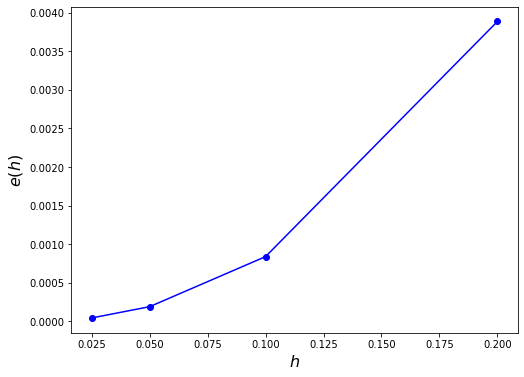

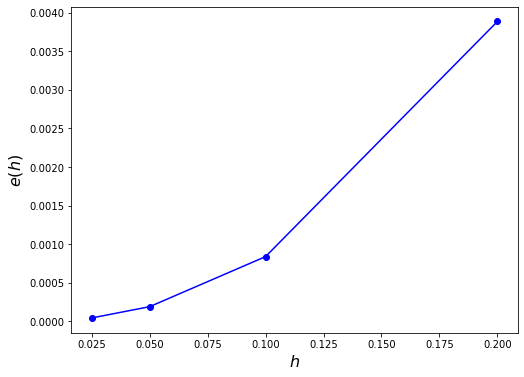

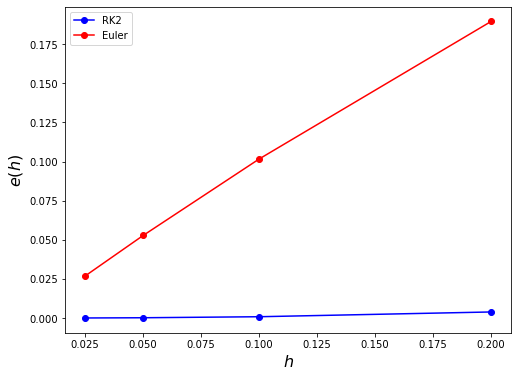

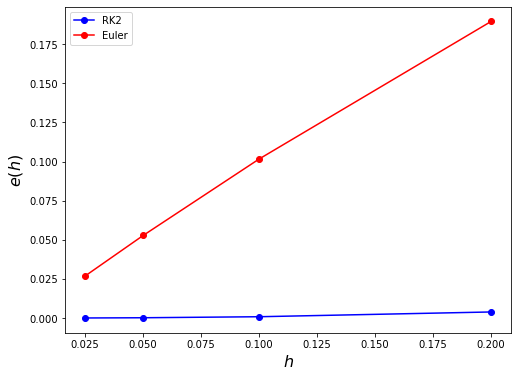

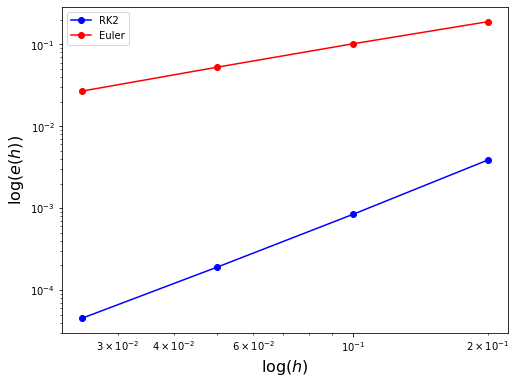

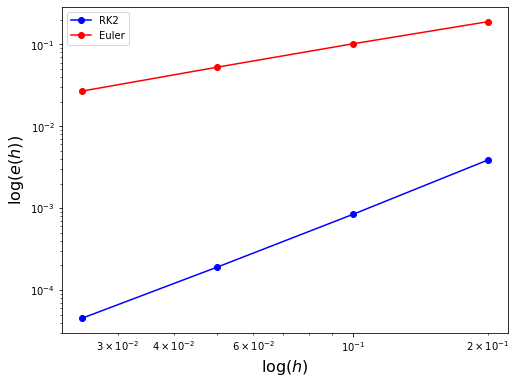

In [4]:
def euler(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    for n in range(len(t) - 1):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def rk2(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    for n in range(len(t) - 1):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


# Calculate solution for decreasing step lengths and plot the solution
hvalues = [0.2, 0.1, 0.05, 0.025]
E_rk2, E_euler = [], []
print("|  $h$  |  Euler   |   RK2    |")
print("|:-----:|:--------:|:--------:|")
for h in hvalues:
    t, y = euler(f, tspan, y0, h)
    E_euler.append(abs(y_exact[-1] - y[-1,0]))
    t, y = rk2(f, tspan, y0, h)
    E_rk2.append(abs(y_exact[-1] - y[-1,0])) 
    print(f"| {h:5.3f} | {E_euler[-1]:7.2e} | {E_rk2[-1]:7.2e} |")


# Approximate the orders
print(f"\nEuler: {(np.log10(E_euler[0]) - np.log10(E_euler[-1])) / (np.log10(hvalues[0]) - np.log10(hvalues[-1])):0.2f}")
print(f"RK2:   {(np.log10(E_rk2[0]) - np.log10(E_rk2[-1])) / (np.log10(hvalues[0]) - np.log10(hvalues[-1])):0.2f}")

# Plot rk2 errors
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(hvalues, E_rk2, 'bo-')
plt.xlabel("$h$", fontsize=16)
plt.ylabel("$e(h)$", fontsize=16)
plt.show()

glue("rk2_gte_plot", fig, display=False)

# Plot error comparison
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(hvalues, E_rk2, "bo-", label="RK2")
plt.plot(hvalues, E_euler, "ro-", label="Euler")
plt.xlabel("$h$", fontsize=16)
plt.ylabel("$e(h)$", fontsize=16)
plt.legend()
plt.show()

glue("rk2_euler_gte_plot", fig, display=False)

# Plot loglog plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.loglog(hvalues, E_rk2, "bo-", label="RK2")
plt.loglog(hvalues, E_euler, "ro-", label="Euler")
plt.xlabel("$\log(h)$", fontsize=16)
plt.ylabel("$\log(e(h))$", fontsize=16)
plt.legend()
plt.show()

glue("rk2_euler_gte_loglog_plot", fig, display=False)